<a href="https://colab.research.google.com/github/kaigitt/GoogleColab/blob/master/%E3%80%90%E7%A0%82%E5%B7%9D%E5%BF%AB%E6%96%97%E3%80%91%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E3%81%AE%E6%BC%94%E7%BF%92_editor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習の演習

## 0. 事前準備

### 0.1 環境構築

まずは次のセルを実行してください。

In [2]:
# こちらのセルを実行してください。
!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 4.5 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=af8ec922c1e4198e5947b7296b2243e3c744c4765e8aa40271d7d7c551d02f2f
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


実行が完了したら、左上のメニューバーから「ランタイム」 $\rightarrow$ 「ランタイムを再起動」を押してください。

ランタイムの再起動が終わったら、次のセルを実行してください。

In [3]:
# こちらのセルを実行してください。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

今回使用するデータをダウンロードします。

次のセルを実行してください。

In [4]:
!wget "https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx" -O 'cycle_training.xlsx'

--2022-04-03 11:14:28--  https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx
Resolving us.v-cdn.net (us.v-cdn.net)... 104.18.193.13, 104.18.194.13, 2606:4700::6812:c10d, ...
Connecting to us.v-cdn.net (us.v-cdn.net)|104.18.193.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62467 (61K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘cycle_training.xlsx’

cycle_training.xlsx 100%[===================>]  61.00K  --.-KB/s    in 0.01s   

2022-04-03 11:14:28 (5.90 MB/s) - ‘cycle_training.xlsx’ saved [62467/62467]



これで、ダウンロードできました。次のセルを実行して、データフレームとして読み込みましょう。

In [5]:
df_cycle = pd.read_excel('cycle_training.xlsx')
df_cycle

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972


これでデータのダウンロードができました。

### 0.2 データ・演習についての説明

今回は天気や日時に関するデータから、レンタサイクルのレンタル数(df_cycleの'count'列)について予測するモデルを作っていただきます。

各列の意味は次のようになっています。
- Instant: 日時固有のID
- Season: 季節	
- year: 年
- dteday: 年月日
- mnth: 月
- holiday: 祝日か否か
- weekday: 曜日
- WorkingDay: 営業日か否か
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数



これらを用いて2011年のデータを学習させ、2012年のcountを予測するモデルを作成してください。

*タイタニックデータと同様に、まずはデータの確認及び可視化を行って、データの外観を理解した上で必要な前処理を実施してください。
その上で適切なモデルを作成し、精度評価を実行するという流れで行ってください。

(こちらはは自由記述課題になります。)

#データの確認

In [ ]:
#レコード数確認
len(df_cycle)

In [ ]:
#カラム数確認
len(df_cycle.columns)

In [ ]:
df_cycle.head()

In [9]:
#データ型確認
df_cycle.dtypes

Instant               object
Season                object
year                   int64
dteday        datetime64[ns]
mnth                   int64
holiday               object
weekday                int64
WorkingDay            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
count                  int64
dtype: object

In [10]:
#各カラムの統計量算出
df_cycle.describe().round(3)

,year,mnth,weekday,temp,atemp,hum,windspeed,count
count,530.000,530.000,530.000,530.000,530.000,530.000,530.000,530.000
mean,2011.311,5.504,2.994,0.473,0.455,0.626,0.196,3900.515
std,0.463,3.362,2.003,0.179,0.160,0.151,0.078,1662.359
min,2011.000,1.000,0.000,0.059,0.079,0.000,0.022,431.000
25%,2011.000,3.000,1.000,0.324,0.322,0.507,0.139,2603.750
50%,2011.000,5.000,3.000,0.464,0.457,0.626,0.189,4062.000
75%,2012.000,8.000,5.000,0.628,0.585,0.738,0.238,4888.500
max,2012.000,12.000,6.000,0.849,0.841,0.972,0.507,8362.000


#データ加工

In [ ]:
df_cycle_except_object = df_cycle[['count', 'dteday', 'year', 'mnth', 'weekday', 'Season', 'holiday', 'WorkingDay', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
df_cycle_except_object

In [ ]:
df_cycle_2012 = df_cycle_except_object[df_cycle_except_object['year'] == 2012]
df_cycle_2012

In [ ]:
df_cycle_except_object = df_cycle_except_object[df_cycle_except_object['year'] == 2011]
df_cycle_except_object

In [ ]:
df_cycle_except_object.dtypes

#データの可視化により関連性調査

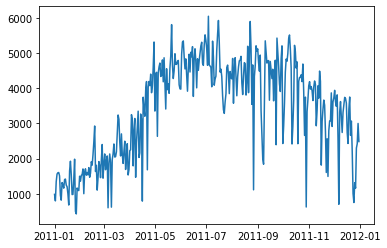

In [84]:
#レンタル数推移
plt.figure()
plt.plot(df_cycle_except_object['dteday'], df_cycle_except_object['count'])
plt.show()

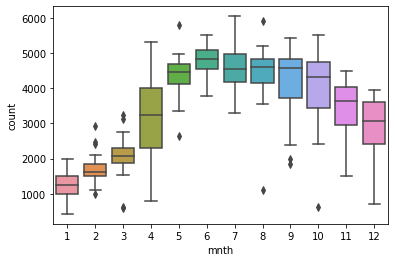

In [78]:
#月ごとのレンタル数
plt.figure()
sns.boxplot(x=df_cycle_except_object['mnth'], y=df_cycle_except_object['count'])
plt.show()

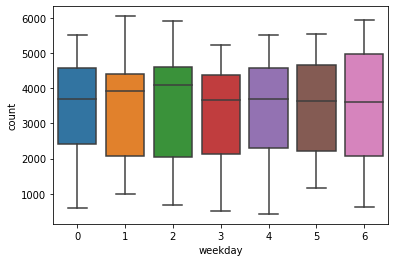

In [17]:
#週単位でのレンタル数
plt.figure()
sns.boxplot(x=df_cycle_except_object['weekday'], y=df_cycle_except_object['count'])
plt.show()

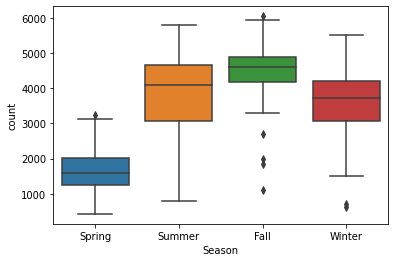

In [18]:
#季節ごとのレンタル数
plt.figure()
sns.boxplot(x=df_cycle_except_object['Season'], y=df_cycle_except_object['count'])
plt.show()

In [ ]:
#天候ごとのレンタル数
plt.figure()
sns.boxplot(x=df_cycle_except_object['weathersit'], y=df_cycle_except_object['count'])
plt.show()

In [ ]:
#体感気温と気温の相関
plt.figure()
plt.scatter(df_cycle_except_object['atemp'], df_cycle_except_object['temp'])
plt.show()

In [ ]:
#体感気温,気温とレンタル数
plt.figure()
plt.scatter(df_cycle_except_object['atemp'], df_cycle_except_object['count'])
plt.scatter(df_cycle_except_object['temp'], df_cycle_except_object['count'])
plt.show()

体感気温と実際の気温はほとんど同じ推移であり
各々レンタル数との相関もほとんど同じため、体感気温はデータから削除し実際の気温のみ分析に用いる

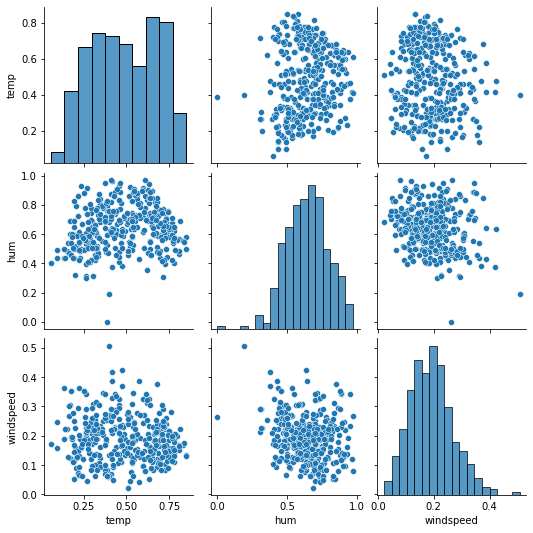

In [23]:
#量的変数のみ散布図行列で確認
df_cycle_countable = df_cycle_except_object[['temp', 'hum','windspeed']]

sns.pairplot(data=df_cycle_countable)

In [ ]:
#各変数間の相関係数確認
df_cycle_except_object.corr()

In [53]:
#予測・学習のために定性的な変数をダミー変数化
df_cycle_except_object = pd.get_dummies(df_cycle[['count', 'year', 'mnth', 'weekday', 'temp', 'hum', 'windspeed', 'Season', 'holiday', 'WorkingDay', 'weathersit']])


In [ ]:
df_cycle_except_object = df_cycle_except_object[df_cycle_except_object['year'] == 2011]
df_cycle_except_object

,count,dteday,year,mnth,weekday,Season,holiday,WorkingDay,weathersit,temp,atemp,hum,windspeed


#学習データ、検証データ分割

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [55]:
X = df_cycle_except_object.drop('count', axis=1)
y = df_cycle_except_object['count']
print(X.shape)
print(y.shape)

(365, 17)
(365,)


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=0)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

   year  mnth  weekday      temp       hum  windspeed  Season_Fall  \
0  2011     1        6  0.344167  0.805833   0.160446            0   
1  2011     1        0  0.363478  0.696087   0.248539            0   
2  2011     1        1  0.196364  0.437273   0.248309            0   
3  2011     1        2  0.200000  0.590435   0.160296            0   
4  2011     1        3  0.226957  0.436957   0.186900            0   

   Season_Spring  Season_Summer  Season_Winter  holiday_No  holiday_Yes  \
0              1              0              0           1            0   
1              1              0              0           1            0   
2              1              0              0           1            0   
3              1              0              0           1            0   
4              1              0              0           1            0   

   WorkingDay_No  WorkingDay_Yes  weathersit_Clear  weathersit_Cloudy  \
0              1               0                 0     

#モデリング

RandomForestRegressorのモデル使用

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
RF = RandomForestRegressor(random_state=0)

In [126]:
random_forest = RF.fit(X_train,y_train)

In [ ]:
y_pred = random_forest.predict(X_test)
y_pred

In [ ]:
plt.scatter(y_pred,y_test)
plt.title('Scatter Plot of Predict vs Test')    
plt.xlabel('予測値') 
plt.ylabel('実測値')    
plt.grid()                                 
plt.show()  

In [ ]:
plt.figure()
#予測値
plt.plot(y_test.reset_index())
#実測値
plt.plot(y_pred)
plt.show()

In [ ]:
#MAPEでの評価
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_pred,y_test)

In [ ]:
#決定係数での評価
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

#2012年レンタル数の予測